In [83]:
import warnings
warnings.filterwarnings("ignore")

## Customer Segmentation using K-Means Clustering



### Importing Data
- Importing and setting up the data to be used

In [84]:
import pandas as pd

X = pd.read_excel("./Datasets/cleaned_scaled.xlsx")
y = X["Churn Value"]
print(X.head())

   Gender  Senior Citizen  Partner  Dependents  Tenure Months  Multiple Lines  \
0       1               0        0           0      -1.236724               0   
1       0               0        0           1      -1.236724               0   
2       0               0        0           1      -0.992402               1   
3       0               0        1           1      -0.177995               1   
4       1               0        0           1       0.677133               1   

   Online Security  Online Backup  Device Protection  Tech Support  ...  \
0                1              1                  0             0  ...   
1                0              0                  0             0  ...   
2                0              0                  1             0  ...   
3                0              0                  1             1  ...   
4                0              1                  1             0  ...   

   Fiber-Optics_Service  DSL_Service  month-to-month_contract 

Applying K-Means Clustering

In [85]:
from sklearn.cluster import KMeans
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
X = X.drop(columns=["Churn Value"])
kmeans.fit(X)
labels = kmeans.predict(X)
print(labels)

[0 0 0 ... 1 0 1]


Visualizing the data and K-Means Clustering Algorithm

vals       0     1
labels            
0       3163  1475
1       2000   394


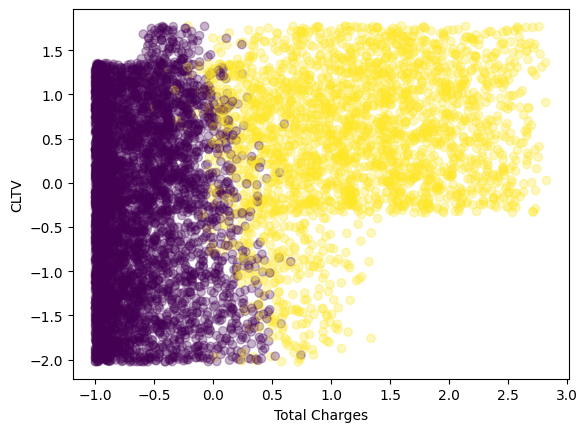

In [86]:
import matplotlib.pyplot as plt

df = pd.DataFrame({'labels': labels, 'vals': y})
ct = pd.crosstab(df["labels"], df["vals"])
print(ct)
plt.scatter(X["Total Charges"], X["CLTV"], c=labels, alpha=0.3)
plt.xlabel("Total Charges")
plt.ylabel("CLTV")
plt.show()

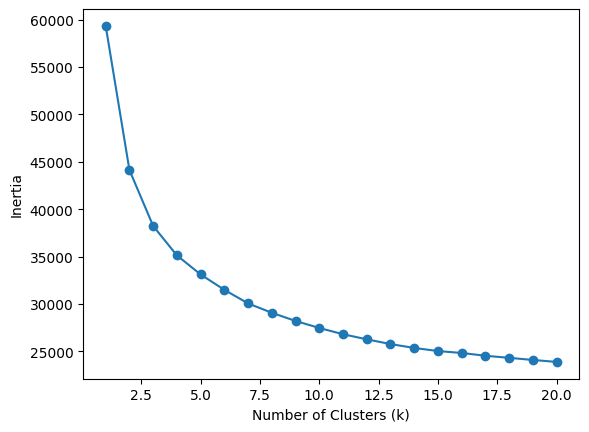

In [87]:
# create a list for number of clusters
num_clusters = list(range(1, 21))
# create inertias list
inertias = []
# iterate through num_clusters to calculate inertias
for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertias.append(model.inertia_)
# plot intertias vs number of clusters
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()